In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import os
import numpy as np
price_csv = os.path.join("..","data","elec_prices_state.csv")
population_csv = os.path.join("..","data","PopTaxes_state.csv")
populationEST_csv=os.path.join("..","data","nst-est2019-01.csv")

In [2]:
#importing and cleaning price data from the original API pull notebooks
price_data = pd.read_csv(price_csv)
price_data = price_data.drop(['Unnamed: 0'], axis=1)
price_data = price_data.rename(columns = {"State":"State Abbreviation"})

In [3]:
#importing and cleaning population data from the original API pull notebooks
population_data = pd.read_csv(population_csv)
population_data = population_data.drop(['Unnamed: 0','Abbreviation_y'], axis=1)

In [4]:
#importing and cleaning population ESTIMATE data
populationEST_data=pd.read_csv(populationEST_csv)
populationEST_data=populationEST_data.rename(columns = {"Unnamed: 0":"State"})
populationEST_data=populationEST_data.drop(columns=["Census","Estimates Base"])

In [5]:
Analysis1_df = price_data.merge(populationEST_data,on="State Abbreviation")

correlation coefficient is 0.02


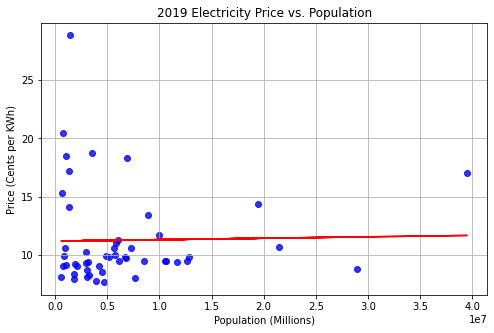

In [6]:
#correlation calculation
correlation = st.pearsonr((Analysis1_df["2019 Pop Est"]),(Analysis1_df["2019 price"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = linregress((Analysis1_df["2019 Pop Est"]),(Analysis1_df["2019 price"]))
regression_values = (Analysis1_df["2019 Pop Est"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(Analysis1_df["2019 Pop Est"]), y=(Analysis1_df["2019 price"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((Analysis1_df["2019 Pop Est"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('2019 Electricity Price vs. Population')
plt.ylabel('Price (Cents per KWh)')
plt.xlabel("Population (Millions)")
#plt.annotate(Analysis1_df["State Abbreviation"], (3,3))
plt.grid()
plt.savefig(os.path.join("..","Images","2019_price_vs_population.png"))

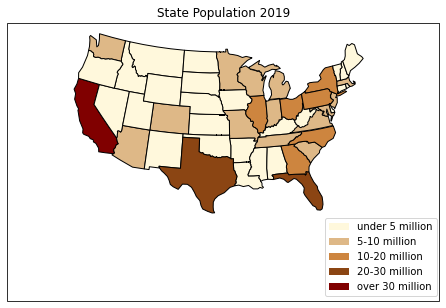

<Figure size 720x576 with 0 Axes>

In [7]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib as mpl
import matplotlib.patches as mpatches

tag_dict = dict(zip(Analysis1_df["State"], Analysis1_df["2019 Pop Est"]))

fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 12, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

popplot = tag_dict

ax.set_title('State Population 2019')

for astate in shpreader.Reader(states_shp).records():

    edgecolor = 'black'

    try:
        state_pop = popplot[ astate.attributes['name'] ]
    except:
        state_pop = 0

    # simple scheme to assign color to each state
    if state_pop < 5000000:
        facecolor = "#FFF8DC"
    elif state_pop > 30000000:
        facecolor = "#800000"   
    elif state_pop > 20000000:
        facecolor = "#8B4513"        
    elif state_pop > 10000000:
        facecolor = "#CD853F"
    else:
        facecolor = "#DEB887"

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

    pop1 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FFF8DC")
    pop2 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#DEB887")
    pop3 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#CD853F")
    pop4 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#8B4513")
    pop5 = mpatches.Rectangle((0, 0), 1, 1, facecolor="#800000")
    labels = ['under 5 million',
              '5-10 million',
             "10-20 million",
             "20-30 million",
             "over 30 million"]
    plt.legend([pop1, pop2, pop3, pop4, pop5], labels,
               loc='lower left', bbox_to_anchor=(0.725, 0.0), fancybox=True)

plt.savefig(os.path.join("..","Images","2019population.png"))
plt.figure(figsize=(10,8))

plt.show()

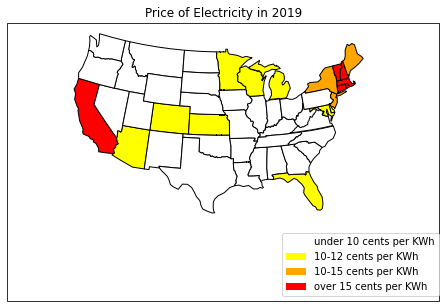

<Figure size 720x576 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [8]:
tag_dict2 = dict(zip(Analysis1_df["State"], Analysis1_df["2019 price"]))
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 12, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

plot = tag_dict2


ax.set_title('Price of Electricity in 2019')

for astate in shpreader.Reader(states_shp).records():
    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_price = plot[ astate.attributes['name'] ]
    except:
        state_price = 0

    # simple scheme to assign color to each state
    if state_price < 10:
        facecolor = "white"
    elif state_price > 15:
        facecolor = "red"        
    elif state_price > 12:
        facecolor = "orange"
    else:
        facecolor = "yellow"

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

    pop1 = mpatches.Rectangle((0, 0), 1, 1, facecolor="white")
    pop2 = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
    pop3 = mpatches.Rectangle((0, 0), 1, 1, facecolor="orange")
    pop4 = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
    labels = ['under 10 cents per KWh',
              '10-12 cents per KWh',
             "10-15 cents per KWh",
             "over 15 cents per KWh"]
    plt.legend([pop1, pop2, pop3, pop4], labels,
               loc='lower left', bbox_to_anchor=(0.625,0.0), fancybox=True)

plt.savefig(os.path.join("..","Images","2019price.png"))
plt.figure(figsize=(10,8))

plt.show()

plt.figure(figsize=(10,7))
plt.show()

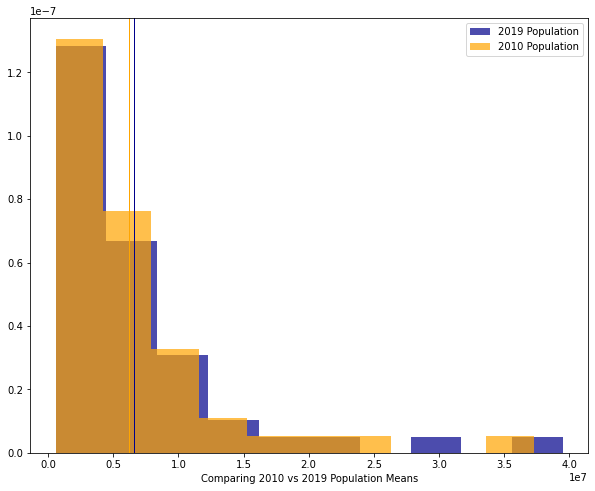

In [9]:
plt.figure(figsize=(10,8))
plt.xlabel("Comparing 2010 vs 2019 Population Means")
plt.hist((Analysis1_df["2019 Pop Est"]), density=True, color='darkblue', alpha=0.7, label="2019 Population")
plt.hist((Analysis1_df["2010 Pop Est"]), density=True, color='orange', alpha=0.7, label="2010 Population")
plt.axvline((Analysis1_df["2019 Pop Est"]).mean(), color='darkblue', linestyle='solid', linewidth=1)
plt.axvline((Analysis1_df["2010 Pop Est"]).mean(), color='orange', linestyle='solid', linewidth=1)
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.legend(loc='upper right')
plt.savefig(os.path.join("..","Images","ttestonpop.png"))

In [10]:
from scipy import stats
stats.ttest_ind((Analysis1_df["2019 Pop Est"]), (Analysis1_df["2010 Pop Est"]))

Ttest_indResult(statistic=0.2638918585755584, pvalue=0.7924173701779269)

In [11]:
print("Data is non-normal. There is no statistical significance in the means of the populations.")

Data is non-normal. There is no statistical significance in the means of the populations.
